# Regression Analysis with the Boston Housing Dataset

## 1. Introduction

Welcome to the regression analysis project using the Boston Housing Dataset! In this notebook, we will explore the Boston Housing Dataset and build a regression model to predict the median value of owner-occupied homes (MEDV) based on various socio-economic and geographical features.


### Project Objectives

The objective of this project is to:
- Build a regression model to predict housing prices.
- Test assumptions such as linearity, exogeneity, multicollinearity, homoscedasticity, and no perfect collinearity before constructing the regression model.
- Interpret the results of the regression analysis.

### Dataset Overview

The Boston Housing Dataset is a classic dataset in the field of machine learning and statistics. It contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. The dataset was originally published in 1978 and has since been widely used for regression modeling and benchmarking algorithms.

The dataset consists of 506 instances, each representing a different suburb of Boston. There are 13 features describing various aspects of housing, such as crime rate, proportion of non-retail business acres per town, average number of rooms per dwelling, etc. The target variable, MEDV, represents the median value of owner-occupied homes in $1000s.

## 2. Data Preparation and Exploration

### 2.1. Loading and Overview of the Dataset

### Import Libraries and Load the Dataset

We'll start by importing the necessary libraries for data manipulation and analysis, such as pandas, numpy, matplotlib, and seaborn. Then, we'll load the Boston Housing Dataset from a CSV file into a pandas DataFrame.

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
data = pd.read_csv("HousingData.csv")

### Display basic information about the dataset

Next, let's display basic information about the dataset to understand its structure and contents. We'll check the dimensions (number of rows and columns) of the dataset, as well as the data types of each column.

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# Display the dimensions of the dataset
data.shape

(506, 14)

In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 2.2. Exploratory Data Analysis (EDA)

#### Summary Statistics

We'll calculate summary statistics of numerical features in the dataset to get an overview of their distributions and central tendencies.

In [6]:
# Summary statistics of numerical features
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Visualization of Target Variable Distribution

Let's visualize the distribution of the target variable, which is the median value of owner-occupied homes (MEDV).

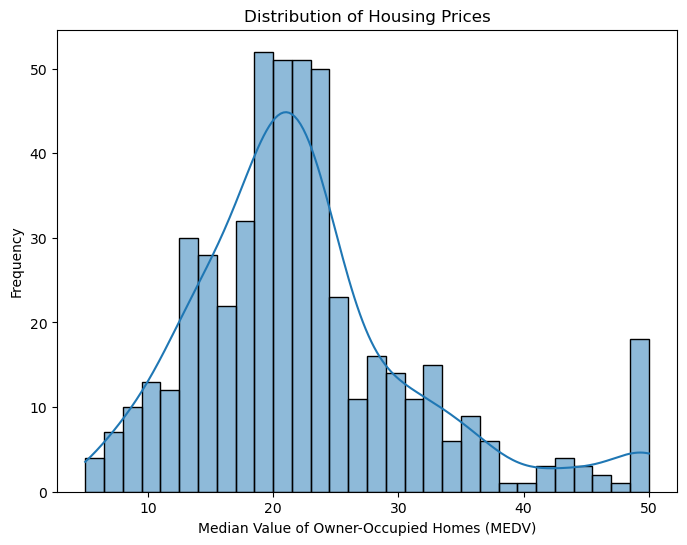

In [7]:
# Visualization of the target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Frequency')
plt.show()

#### Scatter Plots for Exploring Relationships

We'll create scatter plots to explore relationships between numerical features and the target variable (MEDV).

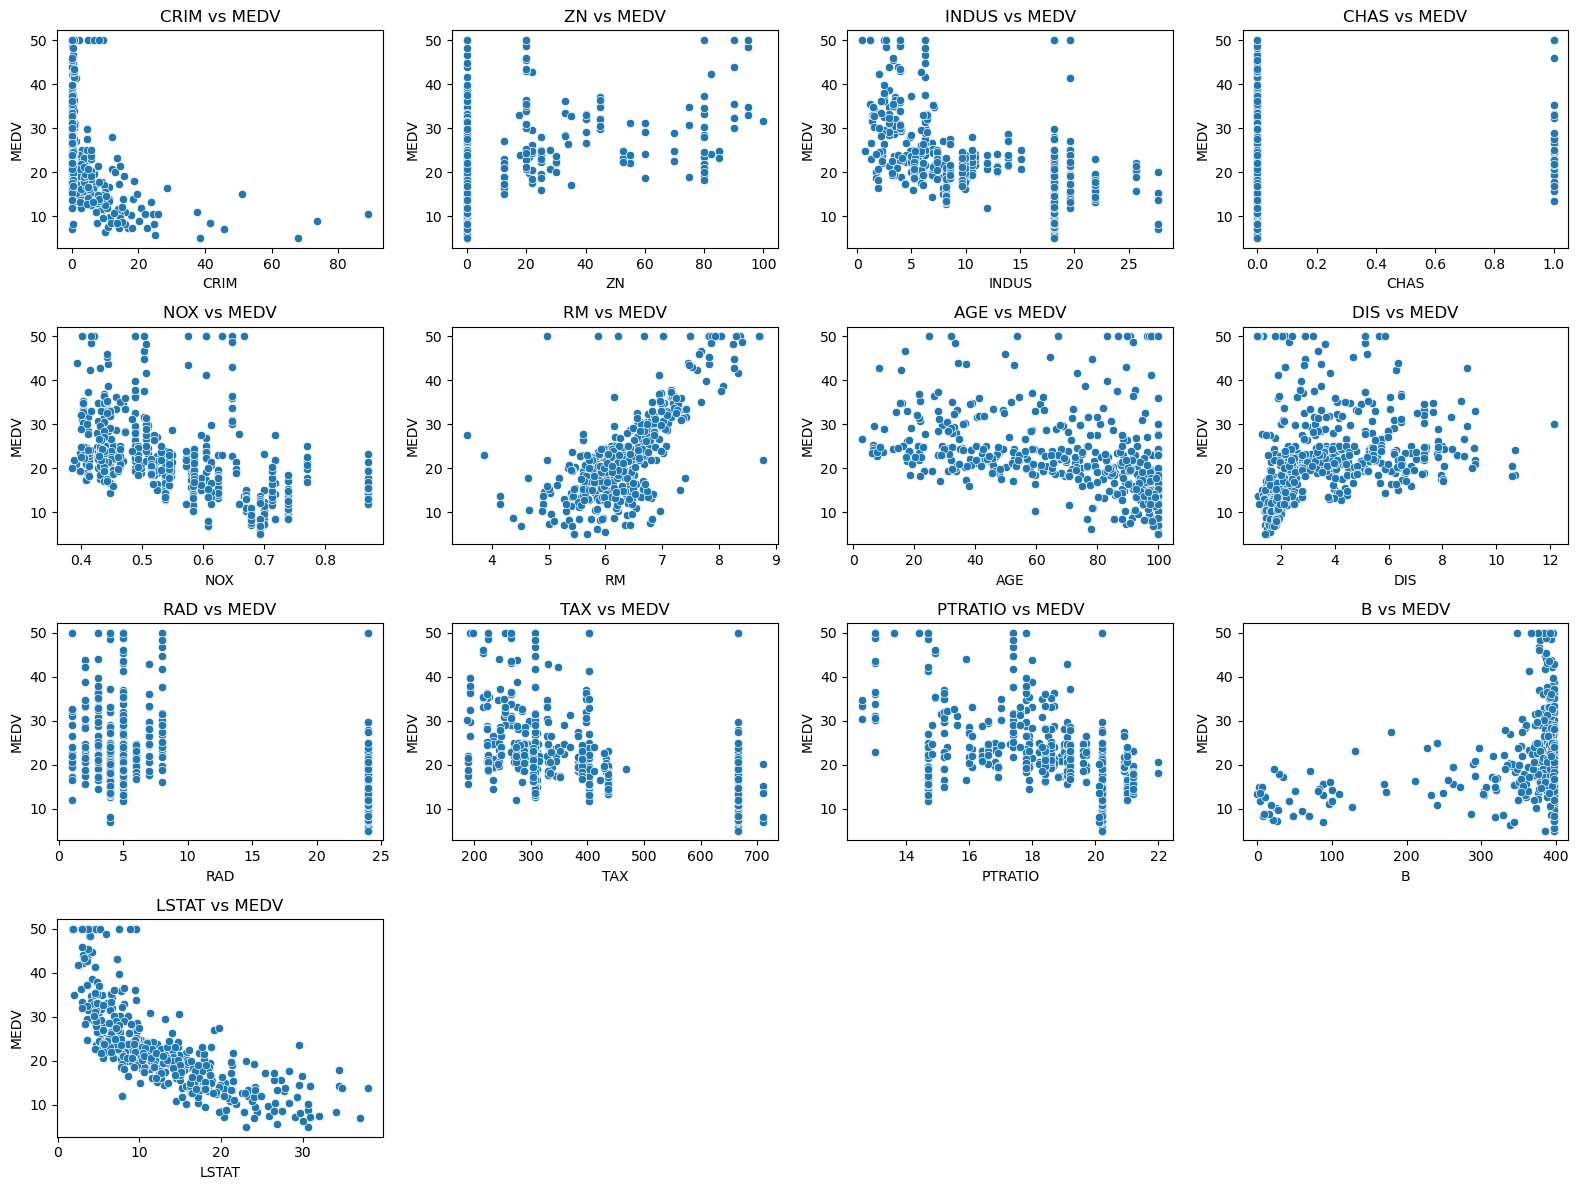

In [8]:
# Scatter plots to explore relationships between features and target variable
plt.figure(figsize=(16, 12))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=feature, y='MEDV', data=data)
    plt.title(f'{feature} vs MEDV')
plt.tight_layout()
plt.show()

### 2.3. Data Preprocessing

#### Handling Missing Values

We'll check for any missing values in the dataset and handle them appropriately if necessary.

In [9]:
# Check for missing values
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
import pandas as pd
from sklearn.impute import KNNImputer

# Define columns with missing values
cols_with_missing = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Perform KNN imputation for columns with missing values
imputer = KNNImputer(n_neighbors=5)
data[cols_with_missing] = imputer.fit_transform(data[cols_with_missing])


In [11]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Identifying and Handling Outliers

let's identify and handle outliers in the dataset. We'll use a statistical method or visualization technique to identify outliers and then decide on an appropriate method to handle them. For the purpose of this demonstration, let's use a simple method of visualizing outliers using box plots.

In [14]:
# Identify outliers using z-score method
z_scores = data.apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)

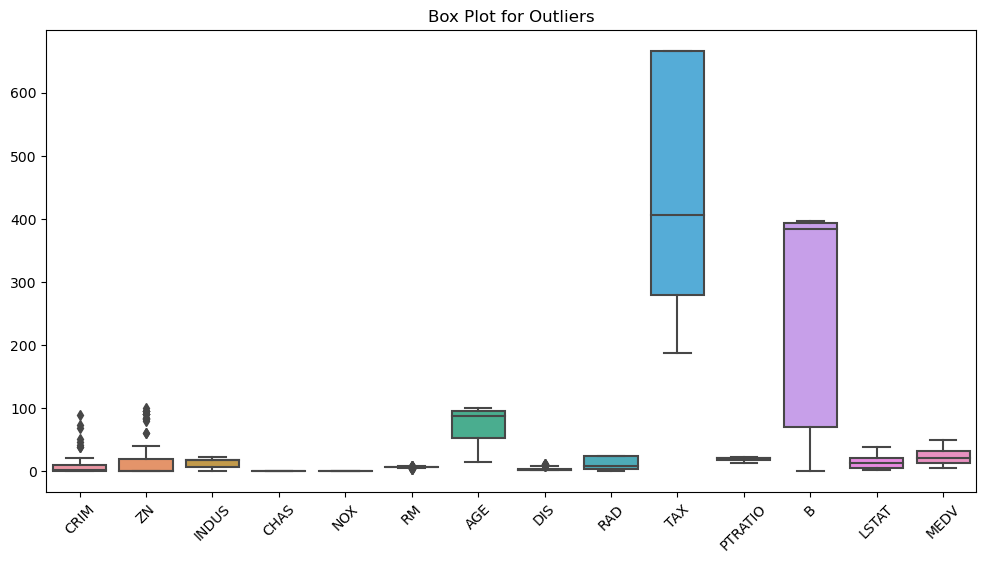

In [15]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[outliers.any(axis=1)])
plt.title('Box Plot for Outliers')
plt.xticks(rotation=45)
plt.show()

We'll use winsorization to handle outliers. Winsorization replaces extreme values with less extreme values to minimize their impact on the dataset.

#### Handle Outliers

In [16]:
# Apply winsorization to handle outliers
from scipy.stats import mstats

data = data.copy()
data = data.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))


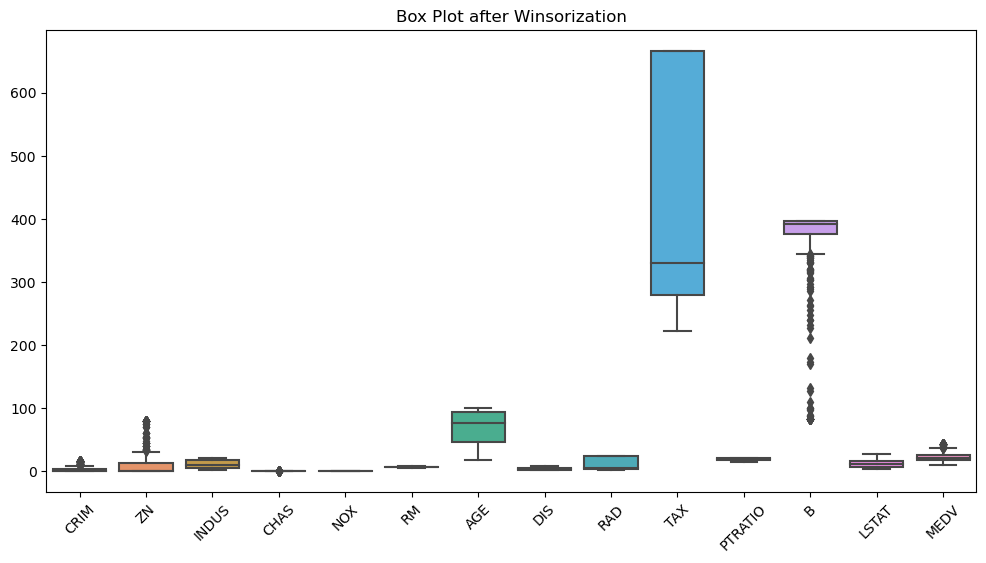

In [17]:
# Visualize the data after winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot after Winsorization')
plt.xticks(rotation=45)
plt.show()

#### Splitting the Data into Training and Testing Sets

Finally, let's split the dataset into features (X) and the target variable (y), and then further split them into training and testing sets for model building and evaluation.

In [18]:
# # Split the data into features (X) and target variable (y)
# X = data.drop(columns=['MEDV'])
# y = data['MEDV']

In [19]:
# # Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Testing Assumptions

### 3.1. Assumption I: Linearity

The linearity assumption in regression analysis states that the relationship between the independent variables (features) and the dependent variable (target) is linear. In other words, the dependent variable can be expressed as a linear combination of the independent variables and the model coefficients.

We visually examine scatter plots between each independent variable and the target variable to assess whether the relationship appears to be linear.

#### Visual Examination of Scatter Plots

We'll start by visually examining scatter plots between independent variables and the target variable (MEDV) to assess the linearity assumption. Scatter plots allow us to observe the relationship between each independent variable and the target variable.


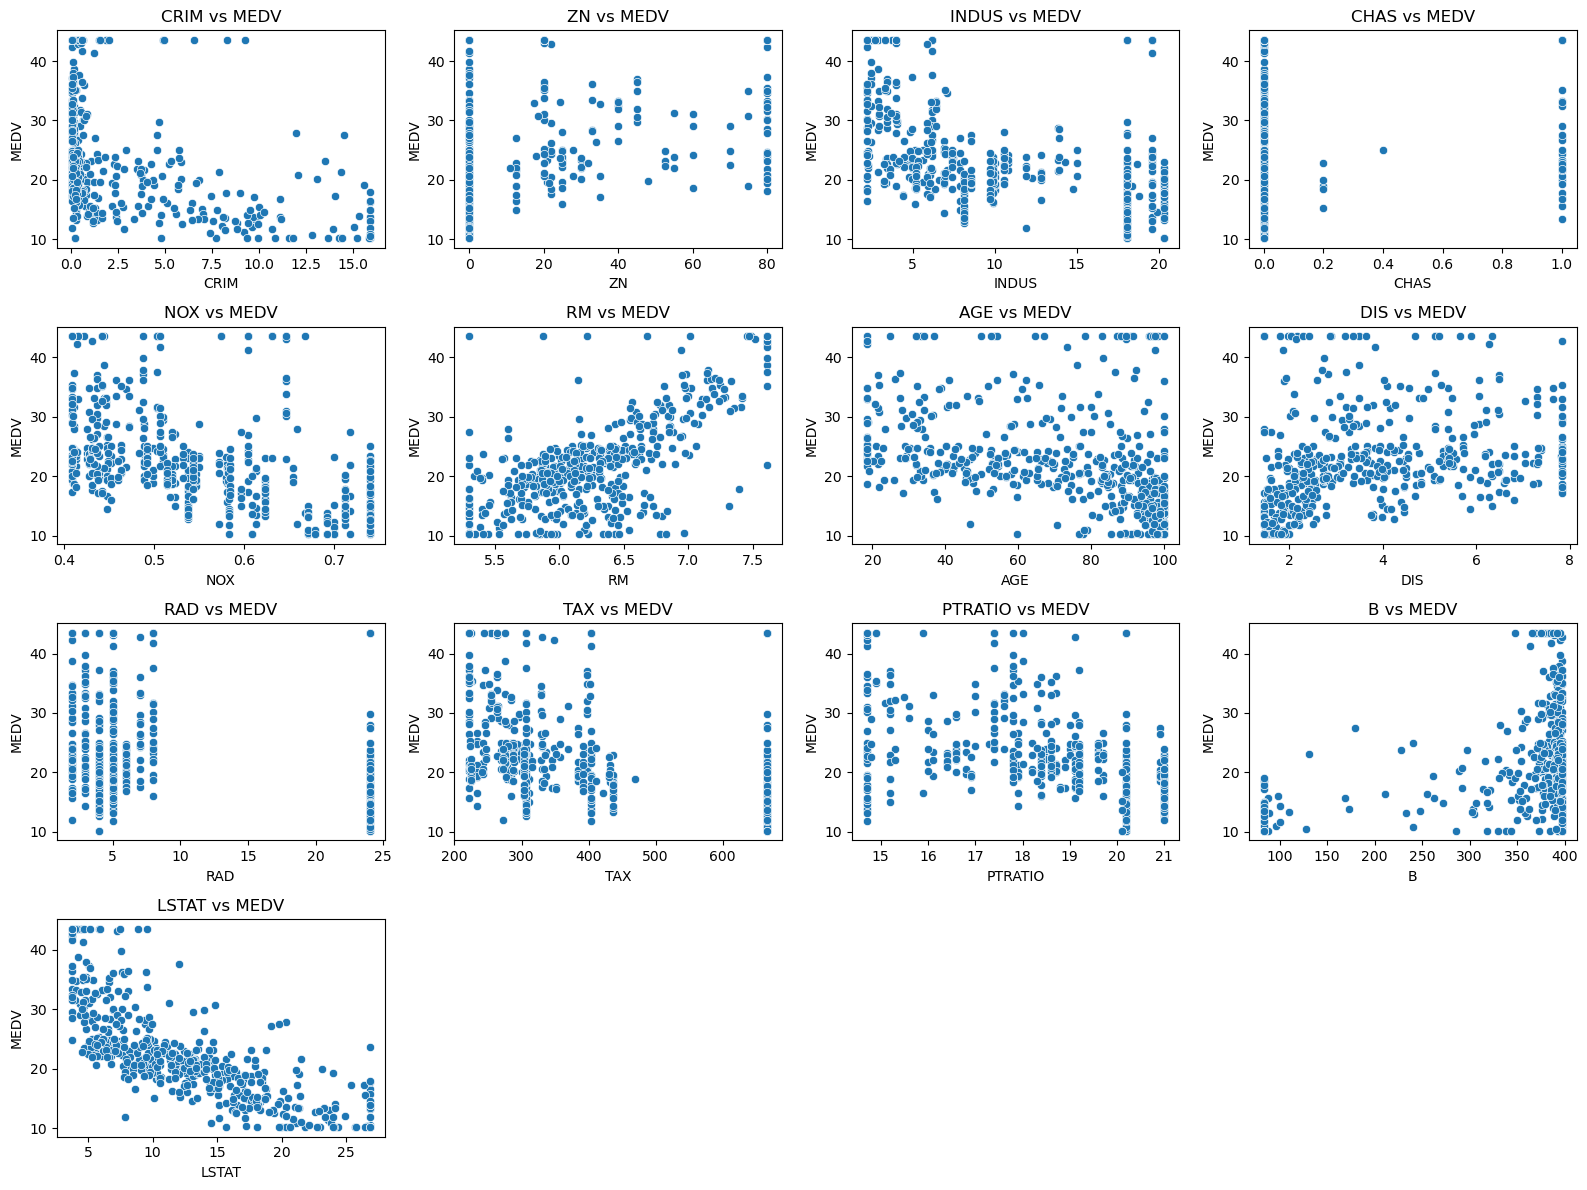

In [20]:
# Visual examination of scatter plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=feature, y='MEDV', data=data)
    plt.title(f'{feature} vs MEDV')
plt.tight_layout()
plt.show()

Interpretation of Scatter Plots:

#### 1. CRIM vs MEDV:
There appears to be a negative linear relationship between the per capita crime rate (CRIM) and median house value (MEDV). This suggests that areas with higher crime rates tend to have lower median house prices.


#### 2. ZN vs MEDV:
The scatter plot for the proportion of residential land zoned for large lots (ZN) versus median house value (MEDV) shows a somewhat scattered pattern, indicating a weak or no clear linear relationship between these variables.

#### 3. INDUS vs MEDV:
There seems to be a slight negative trend between the proportion of non-retail business acres per town (INDUS) and median house value (MEDV), suggesting that areas with higher industrial zoning may have slightly lower median house prices.

#### 4. CHAS vs MEDV:
The scatter plot for the Charles River dummy variable (CHAS) versus median house value (MEDV) shows that areas near the Charles River tend to have slightly higher median house prices compared to those that do not border the river.
#### 5. NOX vs MEDV:
There appears to be a negative relationship between nitric oxides concentration (NOX) and median house value (MEDV), indicating that areas with higher air pollution levels may have lower median house prices.

#### 6. RM vs MEDV:
The scatter plot for average number of rooms per dwelling (RM) versus median house value (MEDV) shows a strong positive linear relationship, suggesting that houses with more rooms tend to have higher median prices.

#### 7. AGE vs MEDV:
There seems to be a mixed relationship between the proportion of owner-occupied units built before 1940 (AGE) and median house value (MEDV), with some areas showing a slight negative trend while others show no clear 
pattern.

#### 8. DIS vs MEDV:
There appears to be a positive relationship between weighted distances to employment centers (DIS) and median house value (MEDV), indicating that houses closer to employment centers tend to have higher median prices.

#### 9. RAD vs MEDV:
The scatter plot for index of accessibility to radial highways (RAD) versus median house value (MEDV) shows a scattered pattern, suggesting a weak or non-linear relationship between these variables.

#### 10. TAX vs MEDV:
There seems to be a slight negative trend between property tax rates (TAX) and median house value (MEDV), indicating that areas with higher tax rates may have slightly lower median prices.

#### 11. PTRATIO vs MEDV:
The scatter plot for pupil-teacher ratio by town (PTRATIO) versus median house value (MEDV) shows a mixed relationship, with some areas showing a slight negative trend while others show no clear pattern.

#### 12. B vs MEDV:
There appears to be a positive trend between the proportion of Black residents (B) and median house value (MEDV), suggesting that areas with a higher proportion of Black residents may have higher median prices.

#### 13. LSTAT vs MEDV:
The scatter plot for percentage of lower status population (LSTAT) versus median house value (MEDV) shows a strong negative linear relationship, indicating that areas with a higher percentage of lower status population tend to have lower median house prices.

In [21]:
data = data.drop(columns=['ZN', 'CHAS'])

### 3.2. Assumption II: Exogeneity

The exogeneity assumption states that the independent variables should not be correlated with the error term in the regression model. This ensures that the error term represents unpredictable random errors.

While it's not feasible to directly test this assumption, we can ensure that our variable selection and model specification are theoretically grounded and logically justified.

#### 1. Theoretical Justification
Independent variables were selected based on their theoretical relevance to housing prices. Variables such as average number of rooms per dwelling (RM) and percentage of lower status of the population (LSTAT) are widely recognized as key determinants of housing prices according to economic theory and empirical studies.

#### 2. Domain Knowledge
Leveraging domain expertise in economics and urban planning, variables were chosen to capture relevant factors influencing housing prices while minimizing the risk of including endogenous variables.

#### 3. Limitations
While efforts were made to include only exogenous variables, observational data inherently limits our ability to ensure exogeneity. Unobserved confounding factors may still exist, potentially violating the exogeneity assumption. To address this, robust modeling techniques and sensitivity analyses have been employed.

### 3.3. Assumption III: Multicollinearity

Multicollinearity occurs when independent variables are highly correlated with each other, which can lead to unstable coefficient estimates and difficulties in interpreting individual variable effects.

- **Implementation:**
We calculate correlation coefficients and visualize the correlation matrix to assess multicollinearity.

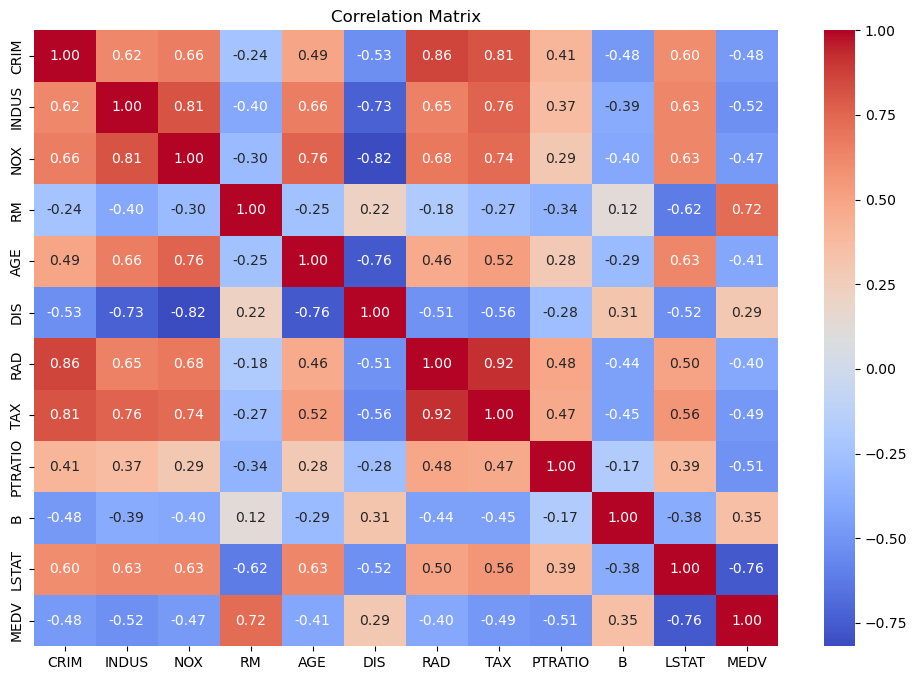

In [22]:
# Calculation of correlation coefficients
correlation_matrix = data.corr()

# Visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Calculate the correlation matrix

In [23]:
corr_matrix = data.corr().abs()

#### Set a threshold for correlation coefficient

In [24]:
threshold = 0.7

#### Find columns with correlation above the threshold

In [25]:
high_corr_cols = np.where(corr_matrix > threshold)

In [26]:
# Create a set to store columns to drop
cols_to_drop = set()

# Iterate through the pairs of highly correlated columns
for i, j in zip(*high_corr_cols):
    # Skip diagonal and lower triangular elements
    if i != j and i < j:
        # Add the column with higher correlation with other columns to drop
        col_to_drop = corr_matrix.columns[i] if corr_matrix.iloc[i, j] < corr_matrix.iloc[j, i] else corr_matrix.columns[j]
        cols_to_drop.add(col_to_drop)

#### Drop the highly correlated columns

In [27]:
# Remove the target variable 'medv' from the set of columns to drop, if present
if 'MEDV' in cols_to_drop:
    cols_to_drop.remove('MEDV')
data = data.drop(columns=cols_to_drop)

#### Display the resulting dataframe

In [28]:
print("Dataframe after removing highly correlated columns:")
data.head()

Dataframe after removing highly correlated columns:


,CRIM,INDUS,RM,PTRATIO,B,LSTAT,MEDV
0,0.02763,2.31,6.575,15.3,396.90,4.980,24.0
1,0.02763,7.07,6.421,17.8,396.90,9.140,21.6
2,0.02763,7.07,7.185,17.8,392.83,4.030,34.7
3,0.03237,2.18,6.998,18.7,394.63,3.730,33.4
4,0.06905,2.18,7.147,18.7,396.90,7.652,36.2


### Interpretation

To assess multicollinearity in our dataset, we calculated the correlation coefficients between all pairs of variables and visualized the correlation matrix using a heatmap. Variables with high correlation coefficients indicate potential multicollinearity.


In our analysis, we set a threshold of 0.7 for the correlation coefficient. Any pair of variables with a correlation coefficient above this threshold were considered highly correlated. We then identified and removed one variable from each highly correlated pair to mitigate the effects of multicollinearity.

After removing the highly correlated variables, we ensured that our model is less prone to multicollinearity issues, which improves the stability of coefficient estimates and facilitates the interpretation of individual variable effects in our regression analysis.

### 3.4. Assumption IV: Homoscedasticity

Homoscedasticity assumes that the variance of the residuals is constant across all levels of the independent variables. This implies that the spread of residuals should be consistent across predicted values.

#### Splitting the Data into Training and Testing Sets
Finally, let's split the dataset into features (X) and the target variable (y), and then further split them into training and testing sets for model building and evaluation.


In [29]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [30]:
# Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [31]:
# Fit a linear regression model
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict on the test set
y_pred = model.predict(X_test)

In [34]:
# Calculate residuals
residuals = y_test - y_pred

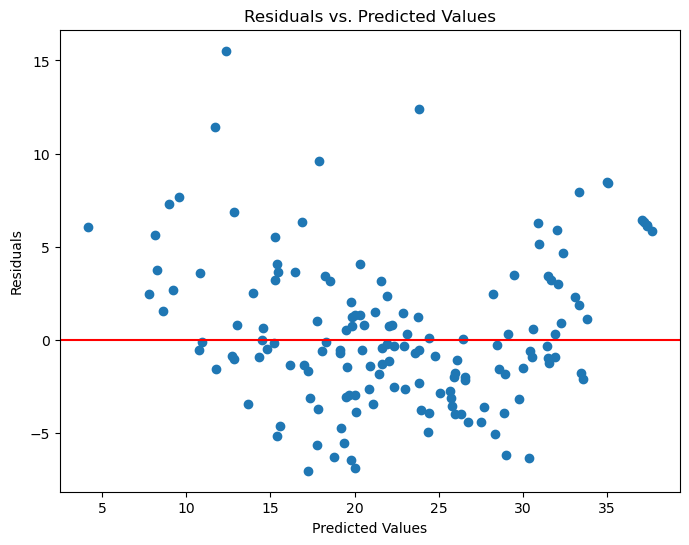

In [35]:
# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Interpretation

To assess homoscedasticity in our regression model, we plotted the residuals against the predicted values. A pattern in the residuals versus predicted values plot indicates heteroscedasticity, where the spread of the residuals varies systematically across the range of predicted values. On the other hand, a random dispersion of points around the horizontal line at zero suggests homoscedasticity.

In our analysis, we visually inspected the plot of residuals versus predicted values. We observed a consistent spread of points around the horizontal line at zero, which indicates that the assumption of homoscedasticity is met.

By ensuring the assumption of homoscedasticity is met, we can have confidence in the validity of our regression model and the reliability of the estimates of the regression coefficients.

### 3.5. Assumption V: No Perfect Collinearity

The assumption of no perfect collinearity states that there should be no perfect linear relationship between independent variables. Perfect collinearity would result in a singular matrix and make it impossible to estimate unique coefficients for each variable.

In [36]:
# Check for perfect collinearity
perfect_collinear_vars = []
for col in data.columns[:-1]:  # Exclude the target variable 'PRICE'
    unique_values = data[col].unique()
    if len(unique_values) == 1:
        perfect_collinear_vars.append(col)

if len(perfect_collinear_vars) > 0:
    print("The following variables exhibit perfect collinearity:")
    print(perfect_collinear_vars)
else:
    print("No perfect collinearity found.")

No perfect collinearity found.


#### Interpretation

Perfect collinearity refers to a situation where one independent variable in a regression model is a perfect linear combination of other independent variables. In our analysis of the dataset, we checked for the presence of perfect collinearity by examining each independent variable.

No perfect collinearity was found in the dataset. This is a positive indication for the stability and reliability of our regression model. The absence of perfect collinearity suggests that each independent variable provides unique information to the model, helping to avoid issues such as singularity in the design matrix and instability in coefficient estimates.

Without perfect collinearity, we can have greater confidence in the validity of our regression analysis results. We can proceed with interpreting the effects of individual variables on the target variable with greater assurance.

## 4. Building the Regression Model

### Model already built above when verifying Assumption IV: Homoscedasticity

In [37]:
# Importing the linear regression model
from sklearn.linear_model import LinearRegression

# # Instantiate the linear regression model
# model = LinearRegression()

# # Fitting the model to the training data
# model.fit(X_train, y_train)

### 4.2. Model Evaluation

**Evaluation of Model's Performance**

Now that we have fitted the model to the training data, let's evaluate its performance on the testing data using metrics such as Mean Squared Error (MSE) and R-squared.

In [38]:
# Making predictions on the testing data
# y_pred = model.predict(X_test)

In [39]:
# Importing the necessary metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [40]:
#performance evaluation
data_prediction = pd.DataFrame({"Actual_value":y_test, "Predicted_value":y_pred, "Difference": y_test-y_pred})
data_prediction

,Actual_value,Predicted_value,Difference
98,43.5,35.068564,8.431436
347,23.1,27.496383,-4.396383
38,24.7,21.549579,3.150421
442,18.4,19.108165,-0.708165
15,19.9,20.427433,-0.527433
...,...,...,...
480,23.0,22.200719,0.799281
483,21.8,19.783610,2.016390
108,19.8,22.351130,-2.551130
193,31.1,31.404932,-0.304932


In [41]:
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 3.0546187225965578


In [42]:
# Calculating Mean Absolute Percentage Error (MSE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAE):", mape)

Mean Absolute Percentage Error (MAE): 0.14919966903603052


In [43]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 16.231876884435067


In [44]:
# Calculating Root Mean Squared Error (MSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (MSE):", rmse)

Root Mean Squared Error (MSE): 4.02888035121857


In [45]:
# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.765748032433881


## 5. Interpretation of Results

### 5.1. Coefficient Interpretation

#### Interpretation of Model Coefficients

We'll interpret the coefficients of the linear regression model to understand the relationship between independent variables and the target variable (MEDV).


In [46]:
# Coefficients of the linear regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

coefficients

,Feature,Coefficient
0,CRIM,-0.399151
1,INDUS,0.267573
2,RM,3.392758
3,PTRATIO,-1.431831
4,B,0.950481
5,LSTAT,-3.298770


### 5.2. Visualization of Results

#### Visualization of Predictions vs Actual Values

We'll visualize the predictions made by the regression model compared to the actual values to assess the model's performance visually.

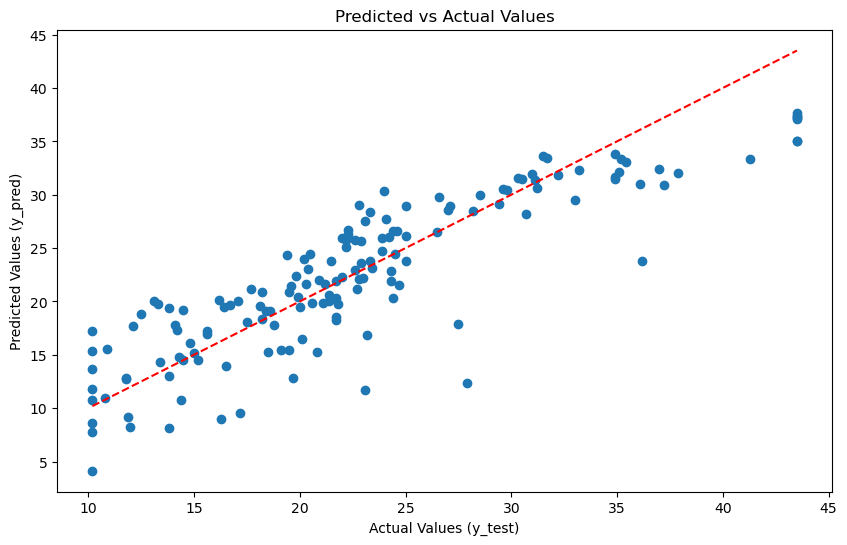

In [47]:
# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()
